# Analysis


In [ ]:
# 1/ The first observation one can make is that there is a strong relation ship between supply and demand in term of average fare per city. 
# Indeed the Urban type of city account for the highest number of drivers making 2/3 of the total of drivers leading to the highest number of rides.
# A deeper dive into another set of data would be necessary to understand the average miles count per ride, but it seems logical that the distance being shorter in urban city with various point of interest from a point A to a point B, the number of rides are therefore more numerous.
# We can notice then that the urban average fare per city (24.6$) is around 30% cheaper than a rural onc (33.3$) where the amount of rides are much less, and also possibly longer since the point of interest could also be more distant from a point A to a point B.

# 2/The number of rides seems to be somehow proportional to the number of drivers regardless of the city type with a slight difference with the rural environment, where less people are in demand.
# The price increase in rural environment is possibly due to less concurence from one driver to another, and comes at a prime cost since the competition is less intense.
# Indeed it is often perceived that urban dense cities have other mode of transportation (subway, bus, trolley etc) than rural cities where people have one to two cars per household.
# Thus getting a lift through Pyber might be more unique and rare. It would be necessary to come with additional set of data to understand what type of population drives this trend.

# 3/ There is a strong concentration of rides in Urban cities finding a sweet spot of 25$ on average per ride for the highest number of drivers. That price seems to be competitive and came naturally as a mean value from the dataset.
# Thus it can be estimated that any ride above that price would induce an additional prime cost of few dollars more trending toward either more distance to ride or a higher peak cost due to the demand/supply at different time of the day.
# Additional data would be necessary to understand the time of the day that people take Pyber as a mode of transportation to figure out what is the reason of the cost.
# A 25, median, 75 percentile chart would be interesting to look at. That being said, with the current data, it is clear that that the highest averaged fare per city in rural area is twice more than the average one in Urban area.

#4/ Overall the scatter plot reveal a pretty clear "hockey stick" curve showing that supply and demand are linked together.
# Indeed the less the rides taken, the more it costs, the more the rides taken, the less it costs.

In [228]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [229]:
# The path to the csv files
city_data_csv = "generated_data/city_data.csv"
ride_data_csv = "generated_data/ride_data.csv"

# Read files city_data
city_data_df= pd.read_csv(city_data_csv)
city_data_df=city_data_df.drop_duplicates("city")

city_data_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [272]:
# Read files ride_data
ride_data_df= pd.read_csv(ride_data_csv)
ride_data_df.head()


,city,date,fare,ride_id
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [231]:
# Combine files
city_ride_df = pd.merge(city_data_df, ride_data_df, on="city")
# Preview files combined
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Tammyburgh,11,Urban,2017-01-02 10:56:28,12.40,7963408790849
1,Tammyburgh,11,Urban,2017-01-02 04:28:03,18.78,2315208159060
2,Tammyburgh,11,Urban,2017-01-03 03:00:08,30.10,558639764959
3,Tammyburgh,11,Urban,2017-01-01 00:10:21,7.76,9113511454178
4,Tammyburgh,11,Urban,2017-01-02 05:22:44,22.00,4171010688543


In [232]:
# check missing data and type
city_ride_df.count()
# city_ride_df.dtypes

city            2375
driver_count    2375
type            2375
date            2375
fare            2375
ride_id         2375
dtype: int64

In [255]:
# Group by City
group_city = city_ride_df.groupby("city")

# Average fare by City
average_fare = group_city["fare"].mean()
average_fare.head()

# Total number of ride by City
ride_count = group_city["ride_id"].count()
ride_count.head()

# Total number of drivers per City
driver_count = group_city["driver_count"].count()
driver_count.head()

# # City type
# city_type = city_data_df.set_index("city")["type"]
# city_type.value_counts()

city
Adamschester     9
Alexisfort      33
Amberberg       16
Anthonyfurt     17
Boyleberg        5
Name: driver_count, dtype: int64

In [256]:
# create dataframe

city_data = pd.DataFrame({"Number of Rides":ride_count,
                          "Average Fare per City":average_fare, 
                          "Number of Drivers":driver_count, 
                          "City Type":city_type})

# print the results
city_data.head()

# # format the results
# city_data.style.format({"Average Fare per City":"${:.1f}"})

,Average Fare per City,City Type,Number of Drivers,Number of Rides
Adamschester,29.594444,Suburban,9,9
Alexisfort,27.366970,Urban,33,33
Amberberg,28.624375,Suburban,16,16
Anthonyfurt,29.491176,Suburban,17,17
Boyleberg,32.396000,Suburban,5,5


In [257]:
# Highlight Urban rides
urban_type = city_data.loc[city_data["City Type"] == "Urban"]
urban_type.head()

,Average Fare per City,City Type,Number of Drivers,Number of Rides
Alexisfort,27.366970,Urban,33,33
Brianfurt,24.506818,Urban,22,22
Catherinebury,27.307931,Urban,29,29
Curtismouth,25.051935,Urban,31,31
East James,26.550714,Urban,28,28


In [258]:
# Highlight Suburdan rides
suburban_type = city_data.loc[city_data["City Type"] == "Suburban"]
suburban_type.head()

,Average Fare per City,City Type,Number of Drivers,Number of Rides
Adamschester,29.594444,Suburban,9,9
Amberberg,28.624375,Suburban,16,16
Anthonyfurt,29.491176,Suburban,17,17
Boyleberg,32.396000,Suburban,5,5
Davidbury,30.834000,Suburban,20,20


In [259]:
# Highlight Rural rides
rural_type = city_data.loc[city_data["City Type"] == "Rural"]
rural_type.head()

,Average Fare per City,City Type,Number of Drivers,Number of Rides
Campbellmouth,34.177500,Rural,8,8
Davidsonfurt,32.085000,Rural,2,2
Hoganfort,30.985455,Rural,11,11
Joshuaview,37.829091,Rural,11,11
Lake Joshuaburgh,42.265714,Rural,7,7


In [265]:
# Bring results in dataframe
rides_count_summary = city_data.groupby(["City Type"]).sum()["Number of Rides"]
rides_count_summary

City Type
Rural        125
Suburban     625
Urban       1625
Name: Number of Rides, dtype: int64

In [266]:
drivers_count_summary = city_data.groupby(["City Type"]).count()["Number of Drivers"]
drivers_count_summary

City Type
Rural       18
Suburban    42
Urban       66
Name: Number of Drivers, dtype: int64

In [267]:
fare_mean_summary = city_data.groupby(["City Type"]).mean()["Average Fare per City"]
fare_mean_summary 

City Type
Rural       33.304723
Suburban    30.044145
Urban       24.677581
Name: Average Fare per City, dtype: float64

In [269]:
summary_breakdown = pd.DataFrame({"Number of Rides":rides_count_summary,
                          "Average Fare per City":fare_mean_summary, 
                          "Number of Drivers":drivers_count_summary})
summary_breakdown

,Average Fare per City,Number of Drivers,Number of Rides
City Type,,,
Rural,33.304723,18,125
Suburban,30.044145,42,625
Urban,24.677581,66,1625


# Bubble Plot

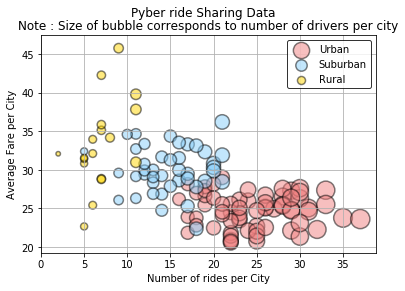

In [239]:
#Create dictionary to hold the color legend for each city as Gold, Light Sky Blue, and Light Coral
color_legend = {"Gold": "#FFD700","Light Sky Blue": "#87CEFA", "Light Coral": "#f08080"}

#Color dictionnary
color_dict = {"Urban":color_legend["Light Coral"], "Suburban":color_legend["Light Sky Blue"], "Rural":color_legend["Gold"]}

#Urban Plot
plt.scatter(urban_type["Number of Rides"], urban_type["Average Fare per City"], color = color_dict["Urban"], edgecolor ="black", s = urban_type["Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)
#SubUrban Plot
plt.scatter(suburban_type["Number of Rides"], suburban_type["Average Fare per City"], color = color_dict["Suburban"], edgecolor ="black", s = suburban_type["Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)
#Rural Plot
plt.scatter(rural_type["Number of Rides"], rural_type["Average Fare per City"], color = color_dict["Rural"], edgecolor ="black", s = rural_type["Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Title, axis plot
plt.suptitle("Pyber ride Sharing Data")
plt.title("Note : Size of bubble corresponds to number of drivers per city")
plt.xlabel("Number of rides per City")
plt.ylabel("Average Fare per City")

#Legends
legend = plt.legend(frameon = True, edgecolor = "black")

plt.grid()

# Save an image of the chart and print to screen
plt.savefig("Scatterplot_Pyber.png")
plt.show()

# Pie chart of Total Fare by City Type

In [240]:
# Total Fare by City Type - Create data for the pie
fare_count_pie = city_ride_df.groupby("type")["fare"].sum()
fare_count_pie

type
Rural        4271.69
Suburban    18779.26
Urban       40093.25
Name: fare, dtype: float64

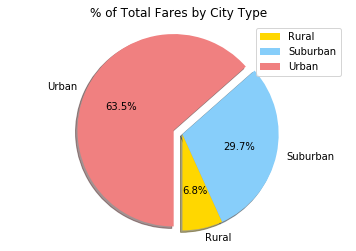

In [241]:
#Create pie chart
fare_count_pie.index

#The colors of each section of the pie chart
colors = ["#FFD700","#87CEFA","#f08080"]

#Set explode format
explode = (0.0, 0.0, 0.1)

#Plot Pie
plt.pie(fare_count_pie, labels = fare_count_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Equal axis chart
plt.axis("equal")

#Add Title
plt.title("% of Total Fares by City Type")

#Add Legends
plt.legend(loc = "upper right")

#Show the chart
plt.savefig("Pie_PyberFareCount.png")
plt.show()

# Pie chart of Total Ride by City Type

In [242]:
# Total Ride by City Type - Create data for the pie
ride_count_pie = city_ride_df.groupby("type")["ride_id"].count()
ride_count_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

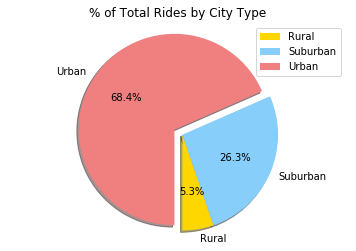

In [243]:
#Create pie chart
ride_count_pie.index

#The colors of each section of the pie chart
colors = ["#FFD700","#87CEFA","#f08080"]

#Set explode format
explode = (0.0, 0.0, 0.1)

#Plot Pie
plt.pie(ride_count_pie, labels = ride_count_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Equal axis chart
plt.axis("equal")

#Add Title
plt.title("% of Total Rides by City Type")

#Add Legends
plt.legend(loc = "upper right")

#Show the chart
plt.savefig("Pie_PyberRideCount.png")
plt.show()

# Pie chart of Number of  Drivers by City Type

In [246]:
# Total Drivers by City Type - Create data for the pie
driver_count_pie = city_ride_df.groupby("type")["driver_count"].count()
driver_count_pie

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

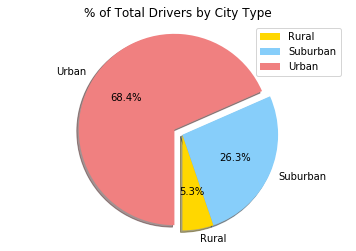

In [247]:
#Create pie chart
driver_count_pie.index

#The colors of each section of the pie chart
colors = ["#FFD700","#87CEFA","#f08080"]

#Set explode format
explode = (0.0, 0.0, 0.1)

#Plot Pie
plt.pie(driver_count_pie, labels = driver_count_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Equal axis chart
plt.axis("equal")

#Add Title
plt.title("% of Total Drivers by City Type")

#Add Legends
plt.legend(loc = "upper right")

#Show the chart
plt.savefig("Pie_PyberDriverCount.png")
plt.show()